In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the datasets
train_data = pd.read_csv('Assignment_Train.csv')
test_data = pd.read_csv('Assignment_Test.csv')

In [3]:
train_data.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [4]:
# Checking the shape of the dataset
print("Shape of the dataset:", train_data.shape)

Shape of the dataset: (10000, 55)


In [5]:
# Dropping irrelevant columns
drop_columns = ['DEALER ID', 'APPLICATION LOGIN DATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 
                'mobile', 'Personal Email Address', 'Pan Name']
train_data = train_data.drop(columns=drop_columns)

In [6]:
train_data.isnull().sum()

HDB BRANCH NAME                           1
HDB BRANCH STATE                        854
AADHAR VERIFIED                           0
Cibil Score                            4297
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
MARITAL STATUS                         4894
GENDER                                    0
DOB                                       0
AGE                                       0
ADDRESS TYPE                           3312
EMPLOY CONSTITUTION                    4998
EMPLOYER NAME                          5010
EMPLOYER TYPE                          4998
name                                      0
vpa                                    2787
upi_name                        

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HDB BRANCH NAME                      9999 non-null   object 
 1   HDB BRANCH STATE                     9146 non-null   object 
 2   AADHAR VERIFIED                      10000 non-null  object 
 3   Cibil Score                          5703 non-null   object 
 4   MOBILE VERIFICATION                  10000 non-null  bool   
 5   DEALER NAME                          9996 non-null   object 
 6   TOTAL ASSET COST                     4892 non-null   float64
 7   ASSET CTG                            4892 non-null   object 
 8   ASSET MODEL NO                       10000 non-null  int64  
 9   APPLIED AMOUNT                       10000 non-null  int64  
 10  PRIMARY ASSET MAKE                   10000 non-null  object 
 11  Primary Asset Model No       

In [8]:
# Calculate approval and decline rates by each branch
branch_approval_rates = train_data.groupby('HDB BRANCH STATE')['Application Status'].value_counts(normalize=True).unstack().fillna(0)
branch_approval_rates.columns = ['Declined', 'Approved']
branch_approval_rates['Approval Rate'] = branch_approval_rates['Approved'] / (branch_approval_rates['Approved'] + branch_approval_rates['Declined'])


In [9]:
# Print branch approval rates
print(branch_approval_rates)


                  Declined  Approved  Approval Rate
HDB BRANCH STATE                                   
ANDHRA PRADESH    0.548077  0.451923       0.451923
ASSAM             0.725962  0.274038       0.274038
BIHAR             0.742054  0.257946       0.257946
CHHATTISGARH      0.632653  0.367347       0.367347
DELHI             0.661448  0.338552       0.338552
GUJARAT           0.623853  0.376147       0.376147
HARYANA           0.614887  0.385113       0.385113
HIMACHAL PRADESH  0.400000  0.600000       0.600000
JHARKHAND         0.674541  0.325459       0.325459
KARNATAKA         0.598916  0.401084       0.401084
KERALA            0.533040  0.466960       0.466960
MADHYA PRADESH    0.651815  0.348185       0.348185
MAHARASHTRA       0.706767  0.293233       0.293233
ORISSA            0.678715  0.321285       0.321285
PUDUCHERRY        0.769231  0.230769       0.230769
PUNJAB            0.558594  0.441406       0.441406
RAJASTHAN         0.637168  0.362832       0.362832
SIKKIM      

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

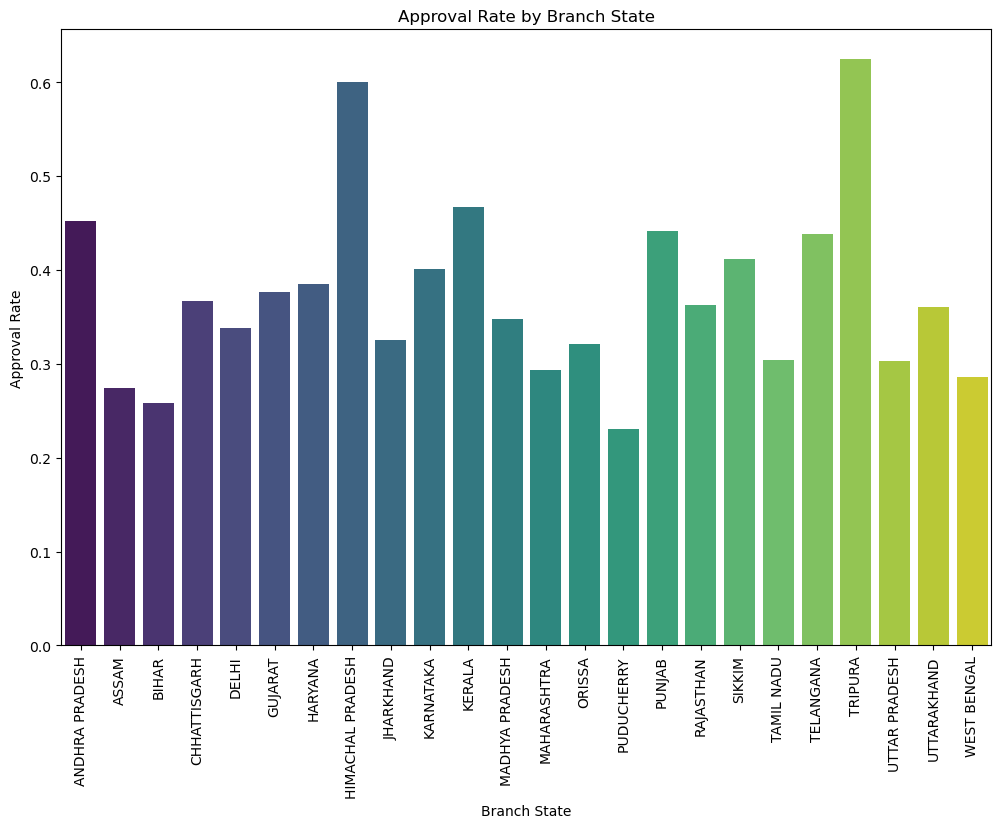

In [10]:
# Plot the approval rate by branch state
plt.figure(figsize=(12, 8))
sns.barplot(x=branch_approval_rates.index, y=branch_approval_rates['Approval Rate'], palette='viridis')
plt.title('Approval Rate by Branch State')
plt.xlabel('Branch State')
plt.xticks(rotation= 90)
plt.ylabel('Approval Rate')
plt.xticks

<Figure size 1200x800 with 0 Axes>

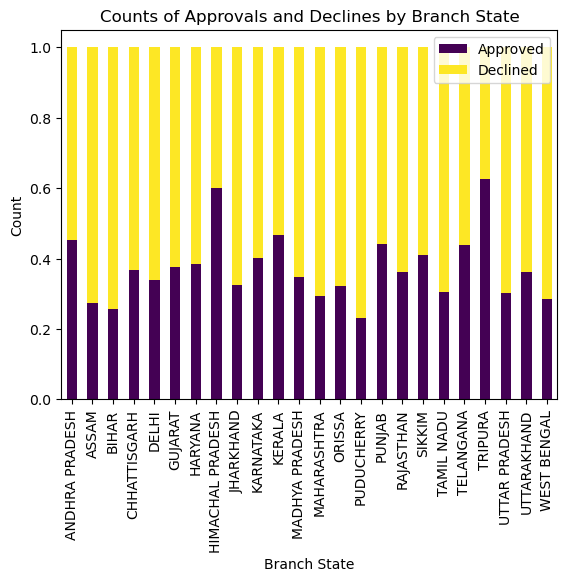

In [11]:
# Plot the count of approvals and declines by branch state
plt.figure(figsize=(12, 8))
branch_approval_rates[['Approved', 'Declined']].plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Counts of Approvals and Declines by Branch State')
plt.xlabel('Branch State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

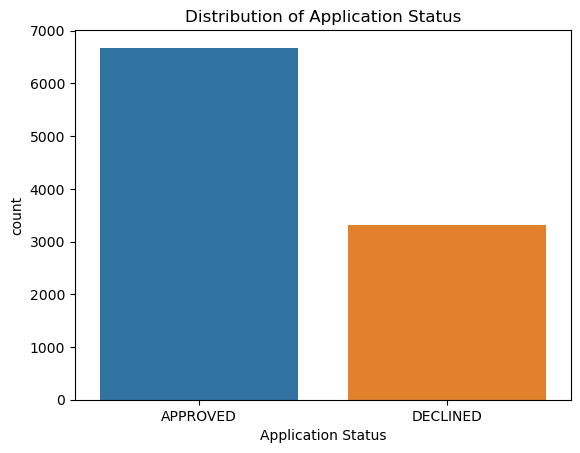

In [12]:
# Checking the distribution of the target variable 'Application Status'
sns.countplot(data=train_data, x='Application Status')
plt.title('Distribution of Application Status')
plt.show()

In [13]:
# Checking the balance of the target variable 'Application Status'
approved_count = train_data['Application Status'].value_counts()
print("Approved vs Declined applications:\n", approved_count)

Approved vs Declined applications:
 APPROVED    6677
DECLINED    3323
Name: Application Status, dtype: int64


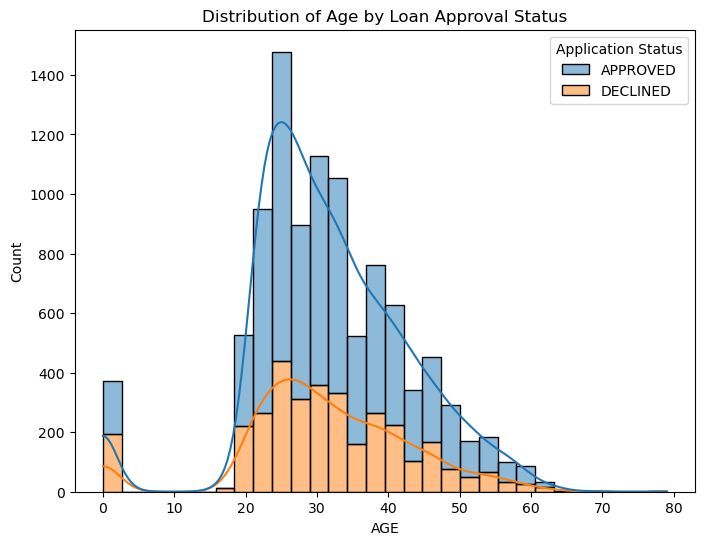

In [14]:
# Plotting the distribution of age for approved and declined loans
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='AGE', hue='Application Status', kde=True, multiple='stack', bins=30)
plt.title('Distribution of Age by Loan Approval Status')
plt.show()

In [15]:
# Crosstab analysis for 'MARITAL STATUS' and 'Application Status'
marital_status_crosstab = pd.crosstab(train_data['MARITAL STATUS'], train_data['Application Status'], normalize='index')
print(marital_status_crosstab)


Application Status  APPROVED  DECLINED
MARITAL STATUS                        
Married             0.983303  0.016697
Single              0.978790  0.021210


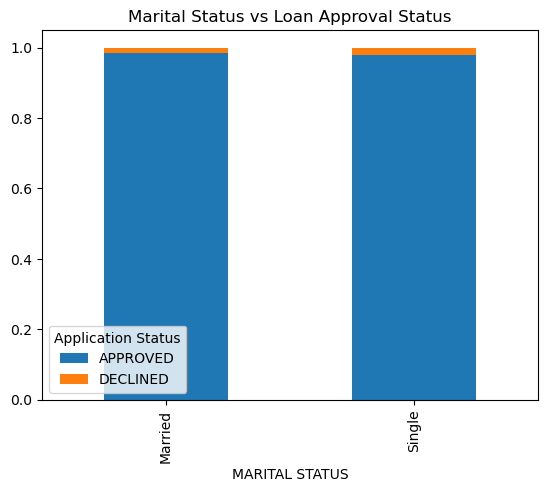

In [16]:
# Visualizing the crosstab data
marital_status_crosstab.plot(kind='bar', stacked=True)
plt.title('Marital Status vs Loan Approval Status')
plt.show()

In [17]:
# Separating features and target variable
X = train_data.drop('Application Status', axis=1)
y = train_data['Application Status']

In [18]:
# Encode target variable (Application Status) - APPROVED as 1, DECLINED as 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
# Handling missing data
# Impute missing numerical values with median
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
X[numerical_columns] = imputer_num.fit_transform(X[numerical_columns])

In [20]:
# Impute missing categorical values with the most frequent value
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_cat.fit_transform(X[categorical_columns])

In [21]:
# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Splitting the data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [24]:
# Model Training using RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predicting on validation set
y_val_pred = model.predict(X_val_scaled)


In [26]:
# Model Evaluation
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)


In [27]:
print("Validation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Validation Accuracy: 0.849

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1327
           1       0.71      0.93      0.81       673

    accuracy                           0.85      2000
   macro avg       0.83      0.87      0.84      2000
weighted avg       0.87      0.85      0.85      2000



In [29]:
# Prediction on test data
test_data[numerical_columns] = imputer_num.transform(test_data[numerical_columns])
test_data[categorical_columns] = imputer_cat.transform(test_data[categorical_columns])


In [30]:
# Encoding test data
X_test = pd.get_dummies(test_data, drop_first=True)

In [31]:
# Ensure the test data has the same number of features as train data
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [32]:
# Standardize test data
X_test_scaled = scaler.transform(X_test)

In [33]:
# Make predictions on test data
test_predictions = model.predict(X_test_scaled)

In [34]:
# Prepare the submission file
submission = pd.DataFrame({'UID': test_data['UID'], 'Prediction': test_predictions})
submission['Prediction'] = label_encoder.inverse_transform(submission['Prediction'])  # Convert back to original labels


In [35]:
# Save to CSV
submission.to_csv('predictions.csv', index=False)